## USAGE OF T-SNE AND ELBOW METHOD

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs, load_iris

In [12]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [13]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df = sns.load_dataset('iris')

In [5]:
# we drop the species column because clustering is unsupervised
# we dont use labels

In [4]:
X = df.drop('species', axis =1)

In [6]:
# Standardize features for better clustering performance 
# Standardization is important because kmeans and t-sne are sensitive to feature scales

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## ELBOW METHOD

In [8]:
# elbow method helps find optimal number of clusters
# it plots inertia ( sum of squared distances to cluster centers ) for different k values 
# The elbow point in the plot suggests the optimal k 
# we balance model complexity and fit 

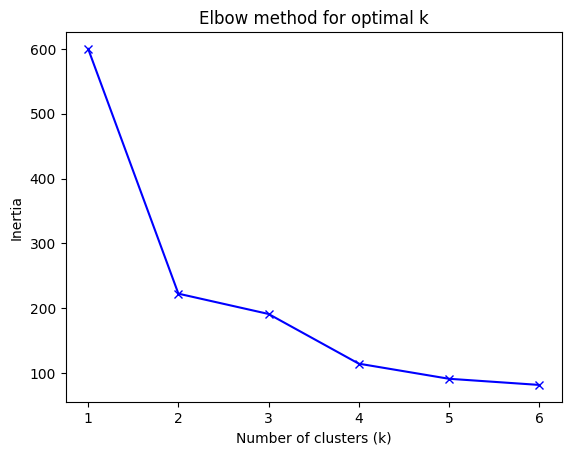

In [14]:
inertia = [] #sum of square distances
K = range(1, 7)
for k in K: 
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal k')
plt.show()

In [15]:
# as k increases, inertia decreases 
# at some point the rate of improvement drops sharply 
# the elbow point is where the curve bends - the first place which adding more clusters yield only small marginal gains
# look for the point where the slope shifts from steep to almost flat

In [16]:
kmeans = KMeans(n_clusters = 3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [17]:
score = silhouette_score(X_scaled, labels)
score

0.4798814508199818

In [18]:
# quantiies the quality of clustering

In [19]:
# T - SNE T-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING - dimensionality reduction technique
# it helps visualize high-dimensional data in 2D or 3D making it easier to see clusters or patterns
# t-SNE is imporrtant because it reveals structure in the data that may not be visible in the original space

In [21]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

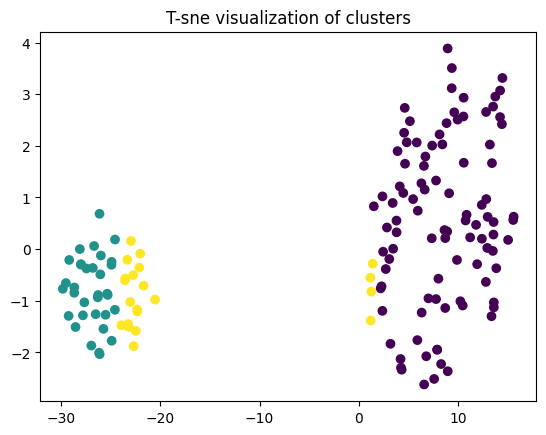

In [23]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = labels, cmap = 'viridis')
plt.title('T-sne visualization of clusters')
plt.show()